In [48]:
!pip install statsmodels

In [49]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [42]:
x = np.array([20,21,22,23,24])
y = np.array([15,16,21,33,42])

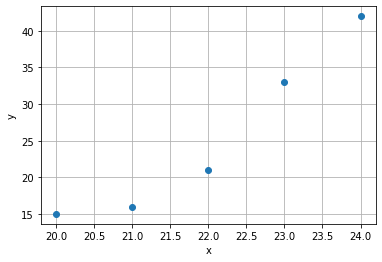

In [43]:
plt.plot(x,y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 선형적인 관계로 가정(모수적 추정)

$$
    f(x) = \beta_0 + \beta_1 x
$$

- 선형적인 관계로 가정하면 모수 $\beta_0$와 $\beta_1$을 찾는 문제로 바꿀 수 있다. 
- 함수를 찾아야 아주 어려운 문제에서 모수를 찾는 쉬운 문제가 된다. 

## 손실(loss), 오차(error), 비용(cost) 함수

- Least Absolute Deaviation(최소절대오차, 최소절대잔차)
$$
\arg\min_{\beta_0, \beta_1} L(\beta_0, \beta_1) = \sum_{i=1}^n |Y_i - \hat Y| \\
$$

- Least Squares Estimation(최소제곱추정)
$$
\arg\min_{\beta_0, \beta_1} L(\beta_0, \beta_1) = \sum_{i=1}^n(Y_i - \hat Y)^2
$$


- LAD는 미분을 적용할 수 없습니다. 

## 손실함수의 정의 

$$
    L(\beta_0, \beta_1) = \arg\min_{\beta_0, \beta_1} \sum_{i=1}^n (Y_i - \beta_0 + \beta_1 X_i)^2
$$

# 자 이제 아이스크림 문제를 풀어 볼게요(선형 회귀)

1. 미분 계수를 구해봅시다. 
    - 기울기 함수(도함수)를 정의 
    - 반복 풀이법을 통해서 기울기가 작아지는 방향으로 모수를 추정할 수 있게 된다. 

In [ ]:
beta0 = sp.symbols('beta0')
beta1 = sp.symbols('beta1')
x = sp.symbols('x')
y = sp.symbols('y')
f = (y - (beta0 + beta1 * x)) ** 2
f

In [ ]:
sp.diff(f, beta0)

In [ ]:
sp.diff(f, beta1)

2. 함수를 정의 해봅시다. 

In [ ]:
def loss(beta0, beta1):
    yhat = beta0 + beta1 * x
    return np.sum( (y - yhat) ** 2 )

def grad_beta0(beta0, beta1):
    return np.sum( 2 * beta0 + 2 * beta1 * x - 2 * y )

def grad_beta1(beta0, beta1):
    return np.sum( -2 * x *( -beta0 - beta1 * x + y))

In [70]:
x = np.array([20,21,22,23,24])
y = np.array([15,16,21,33,42])

3. 반복 풀이법을 통한 모수 추정

In [51]:
w0 = np.array([0,0])
maxIter = 1000000
learning_rate = 0.0001

for it in range(maxIter):
    grad = np.array([grad_beta0(*w0), grad_beta1(*w0)])
    w1 = w0 - learning_rate * grad
    # print('weight: {}, f value: {}'.format(w0, loss(*w0)))
    w0 = w1

In [52]:
loss(*w0)

45.19545418160304

In [53]:
beta = w0

In [54]:
beta

array([-128.64614923,    7.00249976])

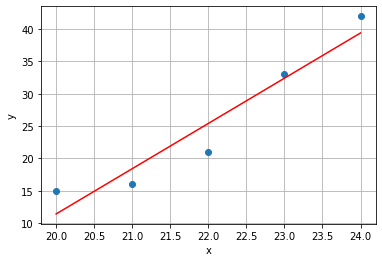

In [55]:
plt.plot(x,y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, beta[0] + beta[1] * x, 'r-')
plt.show()

# statemodels 패키지

In [71]:
print(x)
print(y)

[20 21 22 23 24]
[15 16 21 33 42]


In [72]:
x = sm.add_constant(x, has_constant='add')

In [73]:
model = sm.OLS(y, x).fit()

In [74]:
model.params

array([-130.8,    7.1])

- statsmodels 패키지에는 우리가 지금까지 numpy를 이용해서 확인했던 선형회귀를 구현해주는 라이브러리가 포함되어 있다. 
- 해당 라이브러리를 이용하면 매우 쉽게 회귀계수를 추정할 수 있습니다. 